First, i requested the data from the api, using only 1 url and 1 miles raduoirs of lat and lng which was in the centre of birmingham. - was able create the data and graphs and maps to show what crimes has happned, however this was only restired to one date = which was 2020-05(lastest)- over our task was to look over a prioed from 2020-01 to present. however the api reuqtesed was not working in range which i then extred the cvs download form. below are the steps 

In [1]:
#varblies and definng the URFL 
import csv
import json
import pandas as pd
import requests
import re 
import numpy as np
import matplotlib.pyplot as plt
import folium
from pandas.io.json import json_normalize
import urllib
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

#The URL from police data 
url = "https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date="

#Dates we looking at is from 2020-01 to 2020-05(present)
date_list = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', 
             '2020-10','2020-11', '2020-12' ,'2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', 
             '2022-07', '2022-08', '2022-09', '2022-10','2022-11', '2022-12','2021-01', '2021-02', '2021-03', 
             '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09','2021-10','2021-11', '2021-12']

url = [url + str(i) for i in date_list]
print (url)

['https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-01', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-02', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-03', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-04', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-05', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-06', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-07', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-08', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-09', 'https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-10', 'https://data.police.uk/api/crimes-street/all-cri

In [2]:
websites = url
contents_list = []

for site in websites:
    website = site
    
    r = requests.get(website)
    contents = json.loads(r.text)
    contents_list.append(contents)
    print (contents_list)

[[{'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475308', 'street': {'id': 1255796, 'name': 'On or near Arsenal Street'}, 'longitude': '-1.863434'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80681826, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475316', 'street': {'id': 1255951, 'name': 'On or near Nightclub'}, 'longitude': '-1.898415'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80680682, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.475448', 'street': {'id': 1255888, 'name': 'On or near Further/higher Educational Building'}, 'longitude': '-1.885768'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 80681830, 'location_subtype': '', 'month': '2020-01'}, {'category': 'anti-social-behaviour', 'l

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
#Creating the Dataframe 
df = pd.DataFrame(contents_list)
df

,0,1,2,3,4,5,6,7,8,9,...,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649
0,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
1,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
2,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
3,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
4,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
5,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...",...,None,None,None,None,None,None,None,None,None,None
6,"{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio...","{'category': 'anti-social-behaviour', 'locatio..."

In [4]:
# normlaize the data to make it clear, however at this part this data didnt work, i will be doing the same put only

#df_m1 = pd.json_normalize(df, max_level=3)
#df_m1.head()

In [5]:
response = requests.get("https://data.police.uk/api/crimes-street/all-crime?lat=52.479110&lng=-1.882171&date=2020-05").json()
print(response)

[{'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.468674', 'street': {'id': 1254533, 'name': 'On or near Vaughton Street'}, 'longitude': '-1.889804'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 84295766, 'location_subtype': '', 'month': '2020-05'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.480918', 'street': {'id': 1255979, 'name': 'On or near Temple Row West'}, 'longitude': '-1.899742'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 84293288, 'location_subtype': '', 'month': '2020-05'}, {'category': 'anti-social-behaviour', 'location_type': 'Force', 'location': {'latitude': '52.468674', 'street': {'id': 1254533, 'name': 'On or near Vaughton Street'}, 'longitude': '-1.889804'}, 'context': '', 'outcome_status': None, 'persistent_id': '', 'id': 84293182, 'location_subtype': '', 'month': '2020-05'}, {'category': 'anti-social-behaviour', 'location_type':

In [6]:
#Creating the Dataframe 
df = pd.DataFrame(response)
df.head()

,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '52.468674', 'street': {'id': 125...",,None,,84295766,,2020-05
1,anti-social-behaviour,Force,"{'latitude': '52.480918', 'street': {'id': 125...",,None,,84293288,,2020-05
2,anti-social-behaviour,Force,"{'latitude': '52.468674', 'street': {'id': 125...",,None,,84293182,,2020-05
3,anti-social-behaviour,Force,"{'latitude': '52.489602', 'street': {'id': 125...",,None,,84293134,,2020-05
4,anti-social-behaviour,Force,"{'latitude': '52.475494', 'street': {'id': 125...",,None,,84292996,,2020-05


In [7]:
#Creating the normalize Dataframe 
df_final = pd.json_normalize(response, max_level=1)
df_final.head()

,category,location_type,context,outcome_status,persistent_id,id,location_subtype,month,location.latitude,location.street,location.longitude,outcome_status.category,outcome_status.date
0,anti-social-behaviour,Force,,NaN,,84295766,,2020-05,52.468674,"{'id': 1254533, 'name': 'On or near Vaughton S...",-1.889804,NaN,NaN
1,anti-social-behaviour,Force,,NaN,,84293288,,2020-05,52.480918,"{'id': 1255979, 'name': 'On or near Temple Row...",-1.899742,NaN,NaN
2,anti-social-behaviour,Force,,NaN,,84293182,,2020-05,52.468674,"{'id': 1254533, 'name': 'On or near Vaughton S...",-1.889804,NaN,NaN
3,anti-social-behaviour,Force,,NaN,,84293134,,2020-05,52.489602,"{'id': 1258754, 'name': 'On or near Melvina Ro...",-1.871475,NaN,NaN
4,anti-social-behaviour,Force,,NaN,,84292996,,2020-05,52.475494,"{'id': 1255915, 'name': 'On or near Parking Ar...",-1.896280,NaN,NaN


In [8]:
#sumar clean data frame 
month = df_final ['month']
category = df_final ['category']
location_type = df_final ['location_type']
outcome_status = df_final ['outcome_status.category']
date_of_outcome_status = df_final ['outcome_status.date']
latitude = df_final ['location.latitude']
longitude = df_final ['location.longitude']

summary_table_df = pd.DataFrame({"Month": month, "Category": category, "Location_type": location_type, "Latitude": latitude, "Longitude": longitude, "Outcome_status": outcome_status, "date_of_outcome_status": date_of_outcome_status})
summary_table_df

,Month,Category,Location_type,Latitude,Longitude,Outcome_status,date_of_outcome_status
0,2020-05,anti-social-behaviour,Force,52.468674,-1.889804,NaN,NaN
1,2020-05,anti-social-behaviour,Force,52.480918,-1.899742,NaN,NaN
2,2020-05,anti-social-behaviour,Force,52.468674,-1.889804,NaN,NaN
3,2020-05,anti-social-behaviour,Force,52.489602,-1.871475,NaN,NaN
4,2020-05,anti-social-behaviour,Force,52.475494,-1.896280,NaN,NaN
...,...,...,...,...,...,...,...
618,2020-05,other-crime,Force,52.486625,-1.862766,Court result unavailable,2020-12
619,2020-05,other-crime,Force,52.490792,-1.874859,Court result unavailable,2020-11
620,2020-05,other-crime,Force,52.475237,-1.900241,Investigation complete; no suspect identified,2020-05
621,2020-05,other-crime,Force,52.468530,-1.880413,Action to be taken by another organisation,2020-05


In [9]:
# the number of crimes in 1 mile radus of birmingham.
Number_of_crime= len(df["category"])
Number_of_crime

623

In [10]:
# the number of types of crimes in 1 mile radus of birmingham.
Number_of_type_of_crime= len(df["category"].unique())
Number_of_type_of_crime

14

the number of types of crimes in 1 mile radus of birmingham.
Number_of_type_of_outcome = len(df["outcome_status"].unique())
Number_of_type_of_outcome

In [11]:
# the number of types of crimes in 1 mile radus of birmingham. IN DATA FORMATE
crime_count = summary_table_df["Category"].value_counts()
crime_count

anti-social-behaviour    175
violent-crime            161
public-order              55
criminal-damage-arson     41
other-theft               39
shoplifting               28
vehicle-crime             27
drugs                     25
robbery                   25
burglary                  23
possession-of-weapons      7
other-crime                7
theft-from-the-person      6
bicycle-theft              4
Name: Category, dtype: int64

Text(0.5, 1.0, 'Number of Crime per Crime type')

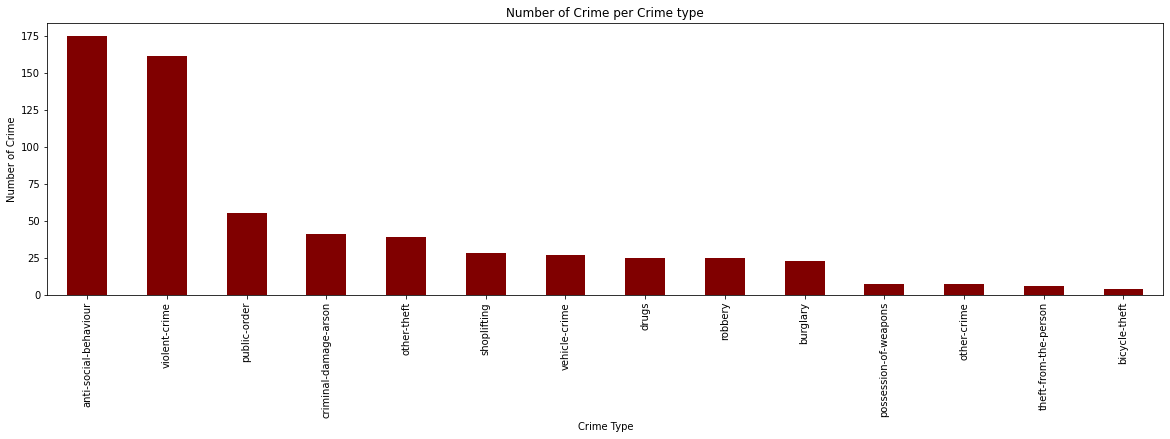

In [13]:
# Create a Pandas bar plot 
plot_crime = crime_count.plot.bar(color='maroon', figsize=(20,5))  


plt.xlabel("Crime Type")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per Crime type")

In [14]:
# crime dates 
crime_dates = summary_table_df["Month"].value_counts()
crime_dates

2020-05    623
Name: Month, dtype: int64

In [15]:
# the number of types of crimes in 1 mile radus of birmingham. IN DATA FORMATE
crime_outcome = summary_table_df["Outcome_status"].value_counts()
crime_outcome

Investigation complete; no suspect identified    215
Unable to prosecute suspect                      134
Court result unavailable                          44
Status update unavailable                         35
Offender given a drugs possession warning          9
Offender given a caution                           5
Formal action is not in the public interest        3
Local resolution                                   2
Action to be taken by another organisation         1
Name: Outcome_status, dtype: int64

Text(0.5, 1.0, 'Number of Crime per Outcome type')

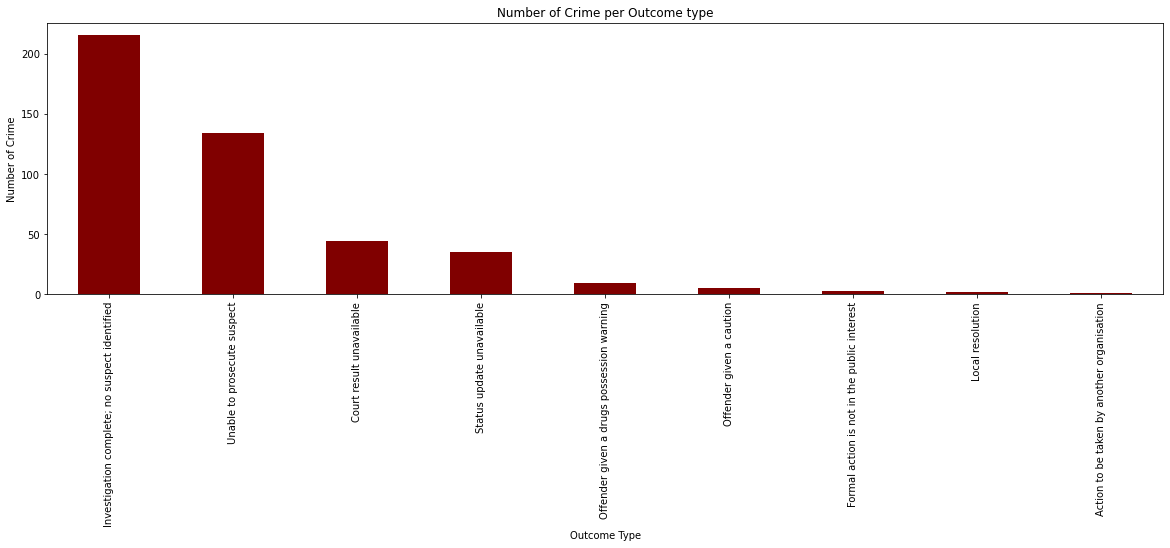

In [16]:
# Create a Pandas bar plot 
plot_outcome = crime_outcome.plot.bar(color='maroon', figsize=(20,5))  

plt.xlabel("Outcome Type")
plt.ylabel("Number of Crime")
plt.title("Number of Crime per Outcome type")

In [17]:
#creating the map 
crime_data = summary_table_df

my_maps = folium.Map(
    location = [52.46705703179184, -1.7719295917681033],
    zoom_start = 8
)

#defing the colours of each catergoy of crim 
def select_marker_color(row):
    if row ['Outcome_status'] == 'Investigation complete; no suspect identified' :
            return 'pink'
    if row ['Outcome_status'] == 'Under investigation':
        return 'purple'
    if row ['Outcome_status'] == 'Unable to prosecute suspect':
        return 'yellow'
    if row ['Outcome_status'] == 'Awaiting court outcome':
        return 'baby blue '
    if row ['Outcome_status'] == 'Local resolution':
        return 'green'
    if row ['Outcome_status'] == 'Action to be taken by another organisation':
        return 'orange'
    if row ['Outcome_status'] == 'Offender given a caution':
        return 'Maroon'

    #creating a the map     
crime_data['colour'] = crime_data.apply(select_marker_color, axis=1)
crime_data.head(3)

for _, crime in crime_data.iterrows():
     folium.Marker(
        location = [crime['Latitude'], crime['Longitude']],
        popup = crime ['Category'],
         tooltip = crime ['Category'],
         icon = folium.Icon(color = crime['colour'], preflix = 'fa', icon = 'circle')
     ).add_to(my_maps)

my_maps

/var/folders/g5/46fnvckx5g7cqt_7ggtz4h4r0000gn/T/ipykernel_53774/1186935796.py:35: UserWarning: color argument of Icon should be one of: {'pink', 'lightgreen', 'lightgray', 'lightblue', 'darkred', 'orange', 'green', 'darkblue', 'darkgreen', 'red', 'lightred', 'cadetblue', 'purple', 'white', 'blue', 'gray', 'black', 'darkpurple', 'beige'}.
  icon = folium.Icon(color = crime['colour'], preflix = 'fa', icon = 'circle')


In [18]:
#importing the cvs file 
police_data_path = "/Users/tamanikaid/Desktop/project/police_data.csv"
police_data = pd.read_csv(police_data_path)

Police_data_df = pd.DataFrame(police_data)
Police_data_df.head()

,Crime ID,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,Last_outcome_category,Context
0,43b5b235bb9f4d19d1997d7b2ff1557cf7dd242eebdab7...,2020-04,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
1,NaN,2020-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
2,NaN,2020-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
3,bb8af23f2faa0380cb6dbc85a1431da7efbe2fd0304c16...,2020-04,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,NaN,2020-04,West Midlands Police,West Midlands Police,-1.852324,52.596847,On or near Berkswell Close,E01009419,Birmingham 001C,Anti-social behaviour,NaN,NaN


In [19]:
#spilting the code and the aera 
Police_data_df[['location', 'code']] = Police_data_df['LSOA_name'].str.split(' ', n=1, expand=True)
Police_data_df

,Crime ID,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,Last_outcome_category,Context,location,code
0,43b5b235bb9f4d19d1997d7b2ff1557cf7dd242eebdab7...,2020-04,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN,Birmingham,001A
1,NaN,2020-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,Birmingham,001B
2,NaN,2020-04,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,Birmingham,001B
3,bb8af23f2faa0380cb6dbc85a1431da7efbe2fd0304c16...,2020-04,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Violence and sexual offences,Investigation complete; no suspect identified,NaN,Birmingham,001B
4,NaN,2020-04,West Midlands Police,West Midlands Police,-1.852324,52.596847,On or near Berkswell Close,E01009419,Birmingham 001C,Anti-social behaviour,NaN,NaN,Birmingham,001C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864913,1f53f699d194025c25e0fc3fcb5a9704553c53502e8647...,2022-05,West Midlands Police,West Midlands Police,-2.112854,52.580523,On or near Park/Open Space,E01010530,Wolverhampton 035H,Violence and sexual offences,Under investigation,NaN,Wolverhampton,035H
864914,0de2153fcd0a51682f1ebd31311f8e498606e65a0a2ec7...,2022-05,West Midlands Police,West Midlands Police,-2.124530,52.581482,On or near Parking Area,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN,Wolverhampton,035H
864915,e6a43e9c085b1700cdeb6f51eceae21508486ba333fff2...,2022-05,West Midlands Police,West Midlands Police,-2.117131,52.579575,On or near Steelhouse Lane,E01010530,Wolverhampton 035H,Violence and sexual offences,Under investigation,NaN,Wolverhampton,035H
864916,1fe83e58727143c046d4e8244b3764907e09b2b259eed2...,2022-05,West Midlands Police,West Midlands Police,-2.120286,52.578475,On or near Maxwell Road,E01010530,Wolverhampton 035H,Other crime,Under investigation,NaN,Wolverhampton,035H


In [56]:
#clean the table 
month = Police_data_df['Month']
Crime_type = Police_data_df ['Crime_type']
Reported_by = Police_data_df ['Falls_within']
outcome_status = Police_data_df ['Last_outcome_category']
Latitude = Police_data_df['Latitude']
Longitude = Police_data_df ['Longitude']
Locations = Police_data_df ['Location']

police_table_df = pd.DataFrame({"Month" : month, "Crime_type" : Crime_type,
                               "Reported_by": Reported_by, "Locations": Locations, "Latitude" : latitude,
                                "Longitude" : Longitude, "outcome_status": outcome_status })
police_table_df

,Month,Crime_type,Reported_by,Locations,Latitude,Longitude,outcome_status
0,2020-04,Vehicle crime,West Midlands Police,On or near Seymour Gardens,52.588691,-1.850772,Investigation complete; no suspect identified
1,2020-04,Anti-social behaviour,West Midlands Police,On or near Badgers Bank Road,52.598270,-1.840641,NaN
2,2020-04,Anti-social behaviour,West Midlands Police,On or near Badgers Bank Road,52.598270,-1.840641,NaN
3,2020-04,Violence and sexual offences,West Midlands Police,On or near Byron Court,52.597809,-1.839063,Investigation complete; no suspect identified
4,2020-04,Anti-social behaviour,West Midlands Police,On or near Berkswell Close,52.596847,-1.852324,NaN
...,...,...,...,...,...,...,...
864913,2022-05,Violence and sexual offences,West Midlands Police,On or near Park/Open Space,52.580523,-2.112854,Under investigation
864914,2022-05,Violence and sexual offences,West Midlands Police,On or near Parking Area,52.581482,-2.124530,Investigation complete; no suspect identified
864915,2022-05,Violence and sexual offences,West Midlands Police,On or near Steelhouse Lane,52.579575,-2.117131,Under investigation
864916,2022-05,Other crime,West Midlands Police,On or near Maxwell Road,52.578475,-2.120286,Under investigation


In [21]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands 
Number_of_crime= len(Police_data_df["Crime_type"])
Number_of_crime

864918

In [43]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by type 
crime_locations = police_table_df["Locations"].value_counts()
crime_locations

Birmingham       380260
Coventry          97612
Sandwell          97505
Wolverhampton     83538
Walsall           81178
                  ...  
Lewes                 1
Cannock               1
Gwynedd               1
Worthing              1
Portsmouth            1
Name: Locations, Length: 87, dtype: int64

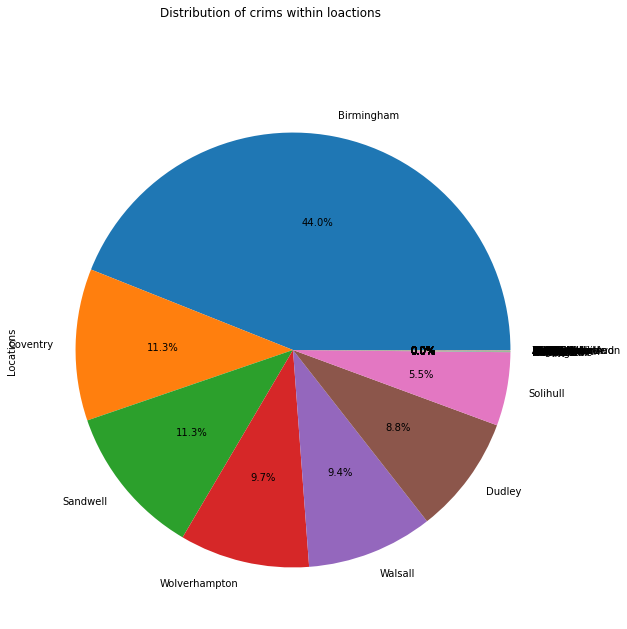

In [42]:
#creating a pie chart 
crime_locations.plot(kind='pie', figsize=(25,10), y= "Locations", title = "Distribution of crims within loactions",
                     subplots=True, startangle=0, autopct="%1.1f%%")
crime_locations.plot

from the graph above the highest crime city is birmigham and the least crimes is in portsmouth over the chosen period 

In [23]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by type 
crime_outcome_1 = police_table_df["Crime_type"].value_counts()
crime_outcome_1

Violence and sexual offences    357514
Anti-social behaviour            99986
Public order                     72783
Vehicle crime                    72388
Criminal damage and arson        62562
Burglary                         47480
Other theft                      47362
Shoplifting                      31683
Robbery                          17770
Drugs                            16305
Other crime                      14885
Possession of weapons            11594
Theft from the person             7075
Bicycle theft                     5531
Name: Crime_type, dtype: int64

In [24]:
# the number of crimes in the west midlands from 2020-01 to 2022-05 in the west midlands catergery by outcome_staues 
crime_outcome_1 = police_table_df["outcome_status"].value_counts()
crime_outcome_1

Investigation complete; no suspect identified          332532
Unable to prosecute suspect                            312444
Status update unavailable                               44934
Court result unavailable                                22957
Under investigation                                     21819
Action to be taken by another organisation               9438
Awaiting court outcome                                   7580
Local resolution                                         7226
Offender given a caution                                 3604
Formal action is not in the public interest               795
Further investigation is not in the public interest       693
Offender given a drugs possession warning                 611
Suspect charged as part of another case                   142
Further action is not in the public interest               89
Offender given penalty notice                              68
Name: outcome_status, dtype: int64

In [25]:
# Create a grouped bar plot 
group_data = police_table_df.groupby(['Locations']).Crime_type.value_counts().unstack()
group_data

Crime_type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Locations,,,,,,,,,,,,,,
Arun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Ashford,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aylesbury,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barnet,NaN,NaN,1.0,NaN,1.0,NaN,5.0,NaN,8.0,5.0,NaN,1.0,1.0,10.0
Basingstoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolverhampton,8922.0,607.0,4348.0,6014.0,1327.0,1533.0,4213.0,1081.0,6957.0,1278.0,3396.0,603.0,6700.0,36559.0
Worcester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
Worthing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Text(0, 0.5, 'Number of Crimes')

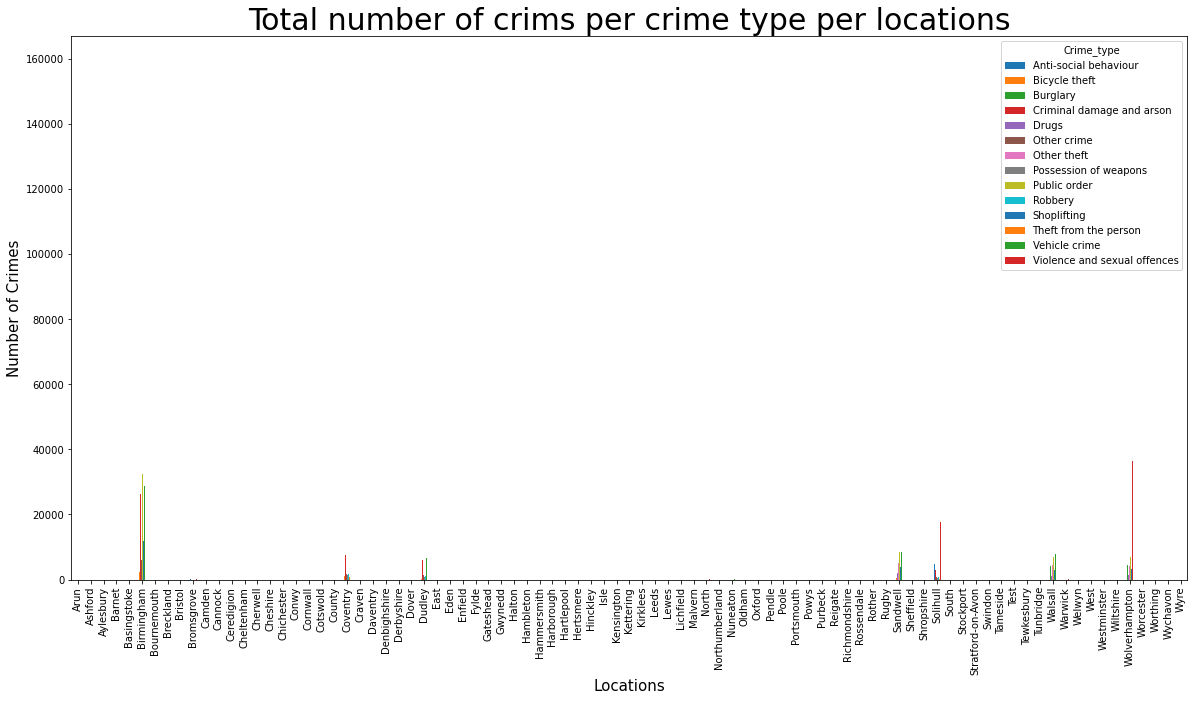

In [30]:
# Create a Pandas bar plot 
police_grouped_bar  = group_data.plot (kind='bar', figsize = (20,10))

plt.title("Total number of crims per crime type per locations" , fontsize = 30)
plt.xlabel("Locations", fontsize = 15)
plt.ylabel("Number of Crimes", fontsize = 15)
                                   

In [63]:
#grouping data by loactiosna dnumber of crimes 
group_data_1 = police_table_df.groupby(['Crime_type']).Locations.value_counts()
group_data_1.head

<bound method NDFrame.head of Crime_type                    Locations                        
Anti-social behaviour         On or near Parking Area              2905
                              On or near Supermarket               2348
                              On or near Sports/Recreation Area    2255
                              On or near Shopping Area             1946
                              On or near Petrol Station            1695
                                                                   ... 
Violence and sexual offences  On or near Yale Drive                   1
                              On or near Yare Grove                   1
                              On or near Yarner Close                 1
                              On or near Yew Croft Avenue             1
                              On or near York Mews                    1
Name: Locations, Length: 123047, dtype: int64>

In [ ]:
crimes_data = police_table_df
crimes_data

#creating the map 
police_data_map = crimes_data

police_maps = folium.Map(
    location = [52.46705703179184, -1.7719295917681033],
    zoom_start = 5
)

for _, crime in police_data_map.iterrows():
     folium.Marker(
         location = [crime['Latitude'], crime['Longitude']],
         popup = crime ['Crime_type'],
     ).add_to(my_maps)

police_maps

# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_capomuline['Weight (g)']
y_values = average_capomuline['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

figure_1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values, color="Pink")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Model/Equation")
plt.xlabel("Mouse weight (g)",)
plt.ylabel("Average Tumor Volume (mm3)")

plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction")